### Lung Cancer - Exploratory Data Analysis (EDA)

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter 

# Define Column Names
# Based on lung-cancer.names: Attribute 1 is the class label, followed by 56 predictive attributes.
# So, the first column is 'label', and then 'attr_1' to 'attr_56'.
lung_cancer_column_names = ['label'] + [f'attr_{i}' for i in range(1, 57)]

#### 1. Load the Lung Cancer Dataset

In [23]:
# --- 2. Load the Dataset ---
file_path = r'C:\Users\User\Documents\MyProjects\FYP_ResearchProject\data\lung+cancer\lung-cancer.data'

# Missing values are denoted by '?' in the data file. 
# Load them as NaN
try:
    df = pd.read_csv(file_path, header=None, names=lung_cancer_column_names, na_values=['?'])
    print("Lung Cancer Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found. Please check the file path.")
    # df = None # Set df to None if loading fails


Lung Cancer Dataset loaded successfully!


#### 2. Initial Inspection

In [24]:
# --- 2. Initial Inspection

print("--- Dataset Shape ---")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

print("\n--- Data Types and Missing Values Info---")
df.info()

print("\n--- Descriptive Statistics ---")
# Note: describe() will show stats for columns that look numerical.
# Since nominal features are 0-3, it will still provide min, max, mean etc.
display(df.describe())

print("\nMissing values per column:")
# This will explicitly show counts for '?' which were converted to NaN
print(df.isnull().sum())

# Total missing value
print(f"\nTotal missing values: ", df.isnull().sum().sum())

# For any duplicated rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


--- Dataset Shape ---
The dataset has 32 rows and 57 columns.

--- Data Types and Missing Values Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    32 non-null     int64  
 1   attr_1   32 non-null     int64  
 2   attr_2   32 non-null     int64  
 3   attr_3   32 non-null     int64  
 4   attr_4   28 non-null     float64
 5   attr_5   32 non-null     int64  
 6   attr_6   32 non-null     int64  
 7   attr_7   32 non-null     int64  
 8   attr_8   32 non-null     int64  
 9   attr_9   32 non-null     int64  
 10  attr_10  32 non-null     int64  
 11  attr_11  32 non-null     int64  
 12  attr_12  32 non-null     int64  
 13  attr_13  32 non-null     int64  
 14  attr_14  32 non-null     int64  
 15  attr_15  32 non-null     int64  
 16  attr_16  32 non-null     int64  
 17  attr_17  32 non-null     int64  
 18  attr_18  32 non-null     in

,label,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,...,attr_47,attr_48,attr_49,attr_50,attr_51,attr_52,attr_53,attr_54,attr_55,attr_56
count,32.000000,32.000000,32.000000,32.000000,28.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,1.392857,0.281250,2.187500,2.125000,2.406250,1.156250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.566947,0.456803,0.737804,0.751343,0.756024,0.514899,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000



Missing values per column:
label      0
attr_1     0
attr_2     0
attr_3     0
attr_4     4
attr_5     0
attr_6     0
attr_7     0
attr_8     0
attr_9     0
attr_10    0
attr_11    0
attr_12    0
attr_13    0
attr_14    0
attr_15    0
attr_16    0
attr_17    0
attr_18    0
attr_19    0
attr_20    0
attr_21    0
attr_22    0
attr_23    0
attr_24    0
attr_25    0
attr_26    0
attr_27    0
attr_28    0
attr_29    0
attr_30    0
attr_31    0
attr_32    0
attr_33    0
attr_34    0
attr_35    0
attr_36    0
attr_37    0
attr_38    1
attr_39    0
attr_40    0
attr_41    0
attr_42    0
attr_43    0
attr_44    0
attr_45    0
attr_46    0
attr_47    0
attr_48    0
attr_49    0
attr_50    0
attr_51    0
attr_52    0
attr_53    0
attr_54    0
attr_55    0
attr_56    0
dtype: int64

Total missing values:  5

Number of duplicate rows: 0


In [25]:
# To .csv
# lung_cancer_df.to_csv('lungcancer.csv', index=False)

#### 3. Handling Missing Values

In [37]:
# --- 3. Handle Missing Values (Example Strategy for Nominal Data) ---
print("--- Handling Missing Values ---")
missing_before = df.isnull().sum().sum()
print(f"Total missing values before imputation: {missing_before}")

# Find columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
if missing_cols:
    print(f"Columns with missing values: {missing_cols}")
    
    # Impute with the mode using a more robust method
    for col in missing_cols:
        mode_val = df[col].mode()[0]
        # This is the key change: Assign the result back to the column
        df[col] = df[col].fillna(mode_val)
        print(f"Missing values in '{col}' imputed with mode value: {mode_val}")

missing_after = df.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {missing_after}")

--- Handling Missing Values ---
Total missing values before imputation: 5
Columns with missing values: ['attr_4', 'attr_38']
Missing values in 'attr_4' imputed with mode value: 1.0
Missing values in 'attr_38' imputed with mode value: 2.0

Total missing values after imputation: 0


In [38]:
# Handling duplicate rows 
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows found : {num_duplicates}")

Number of duplicated rows found : 0


#### 4. Seperate Features (X) and Target (y)

In [39]:
# --- 4. Separate Features (X) and Target (y) ---
# 'label' is the first column.
X_lung = df.drop('label', axis=1) # drop column but if axis = 0 drop ny row
y_lung = df['label']

print(f"\nShape of features (X_lung): {X_lung.shape}")
print(f"Shape of target (y_lung): {y_lung.shape}")


Shape of features (X_lung): (32, 57)
Shape of target (y_lung): (32,)


#### 5. Target Variable Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_2644\2626452476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


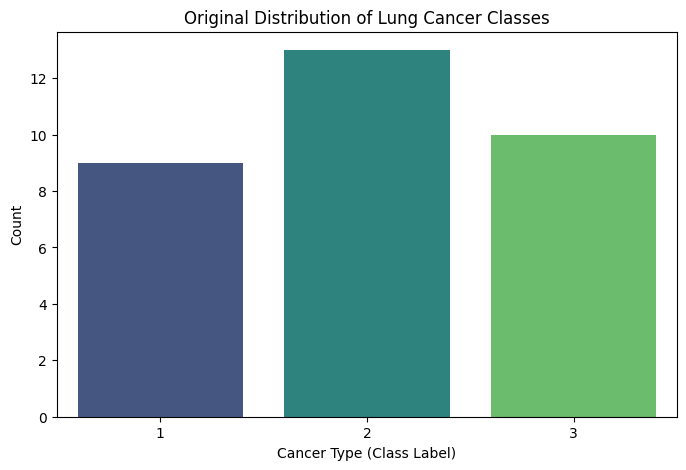

Original class counts:
label
2    13
3    10
1     9
Name: count, dtype: int64


In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Original Distribution of Lung Cancer Classes')
plt.xlabel('Cancer Type (Class Label)')
plt.ylabel('Count')
plt.show()

print("Original class counts:")
print(df['label'].value_counts())

In [ ]:
# EXTRA NOTES SAHAJA
# Then need to restructure to a Binary Problem
# Class 1 will be mapped to label 0
# Class 2 and 3 will be combined and mapped to label 1

#### 6. Restructure to Binary Classification 

C:\Users\User\AppData\Local\Temp\ipykernel_2644\534279340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binary_label', data=df, palette='plasma')


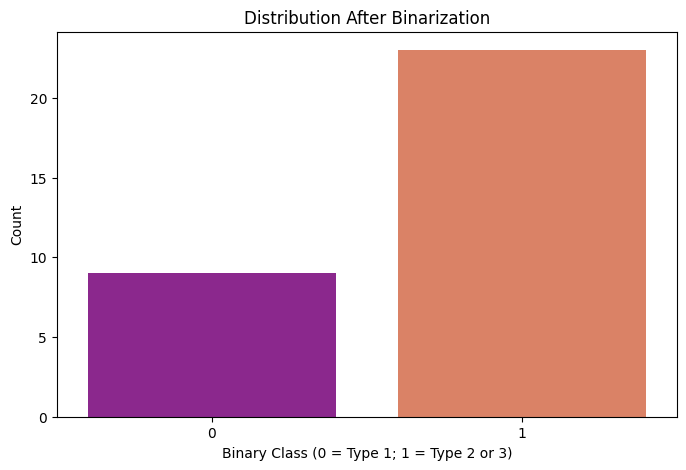

Binary class counts:
binary_label
1    23
0     9
Name: count, dtype: int64

Binary class proportions:
binary_label
1    0.71875
0    0.28125
Name: proportion, dtype: float64


In [42]:
# This is a crucial step for the Lung Cancer dataset.
# Example: Map class 1 to 0 (negative), and classes 2 & 3 to 1 (positive).
# You will need to decide on the exact mapping based on domain knowledge or project needs.
# For this example, let's assume we want to classify 'class 1' vs 'other classes'.

# 1 → 0 (treated as the “negative class” — maybe normal/healthy or baseline)
# 2 or 3 → 1 (treated as the “positive class” — maybe different disease stages)
df['binary_label'] = df['label'].apply(lambda x:0 if x == 1 else 1)

# Analyze the new binary distribution
plt.figure(figsize=(8,5))
sns.countplot(x='binary_label', data=df, palette='plasma')
plt.title('Distribution After Binarization')
plt.xlabel('Binary Class (0 = Type 1; 1 = Type 2 or 3)')
plt.ylabel('Count')
plt.show()

print("Binary class counts:")
print(df['binary_label'].value_counts())
print("\nBinary class proportions:")
print(df['binary_label'].value_counts(normalize=True))

#### 7. Feature Distributions (Countplots for Nominal Features)

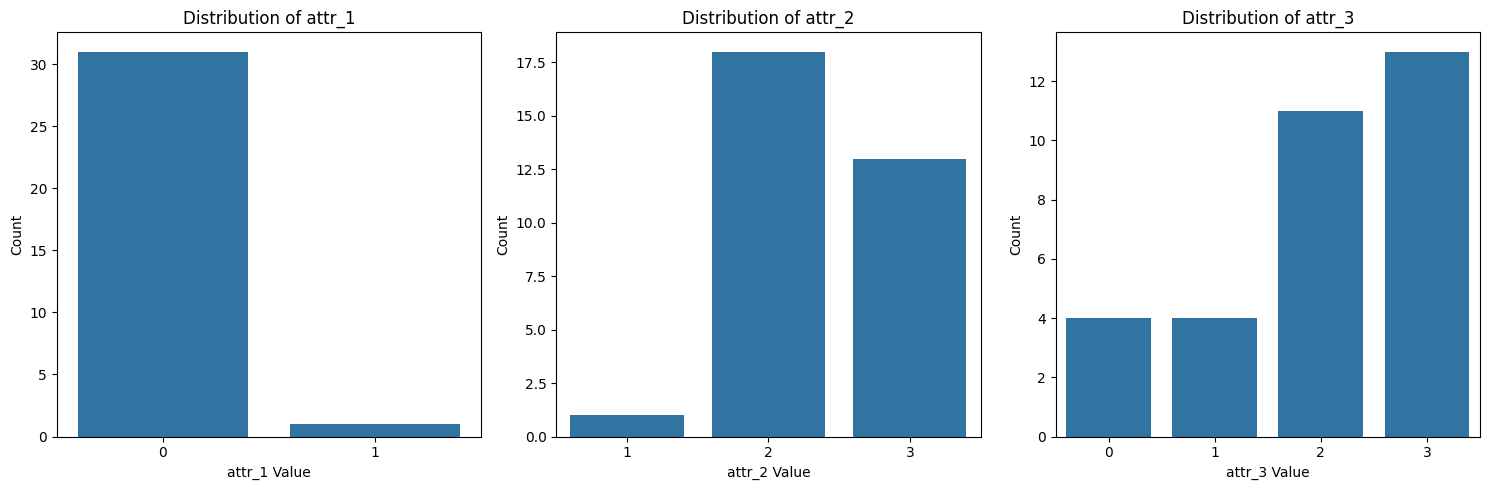


Unique values and counts for selected nominal features:
'attr_1': {0: 31, 1: 1}
'attr_2': {2: 18, 3: 13, 1: 1}
'attr_3': {3: 13, 2: 11, 0: 4, 1: 4}


In [43]:
# Since all predictive attributes are nominal (0-3), countplots are more appropriate than histograms.
# Plotting the first 3 features as an example.
features_to_plot_lung = lung_cancer_column_names[1:4] # Get attr_1, attr_2, attr_3

plt.figure(figsize=(15, 5))
for i, col_name in enumerate(features_to_plot_lung):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=X_lung[col_name])
    plt.title(f'Distribution of {col_name}')
    plt.xlabel(f'{col_name} Value')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\nUnique values and counts for selected nominal features:")
for col in features_to_plot_lung:
    print(f"'{col}': {X_lung[col].value_counts().to_dict()}")

#### 8. Considerations for Correlation Heatmap

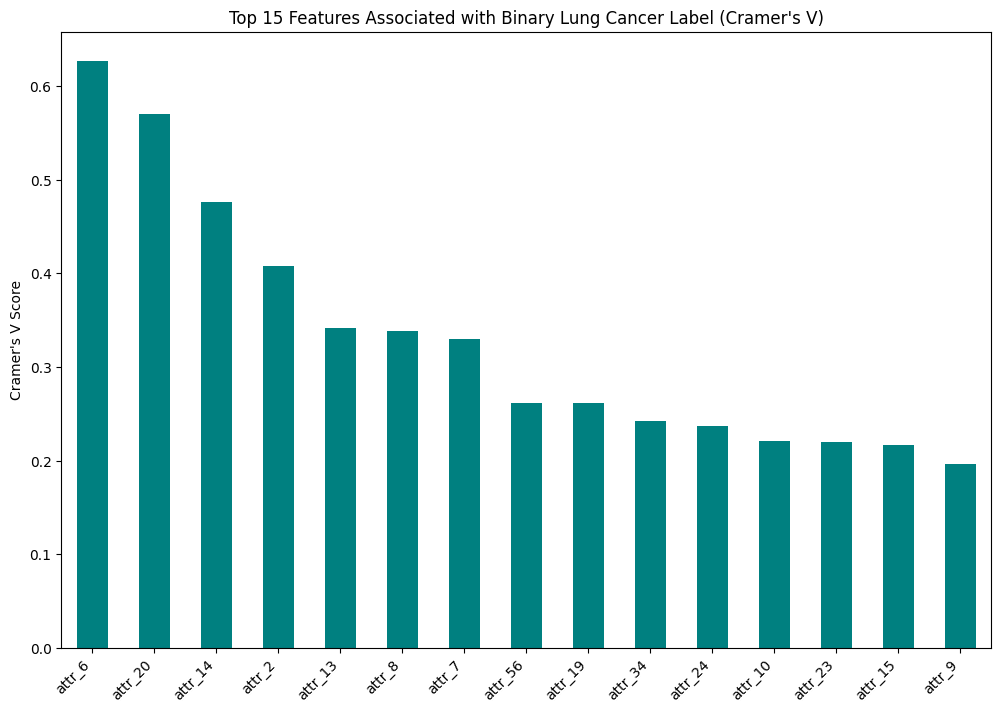

Top 5 most predictive features:
attr_6     0.626382
attr_20    0.570433
attr_14    0.476348
attr_2     0.408154
attr_13    0.341650
dtype: float64


' \nAdditional Notes :\n0 -> No association\n1 -> Perfect association\nWith small N (have 32 for this case), the bias corrected version is much safer\n\n'

In [44]:
# --- 8. No direct correlation heatmap for purely nominal features without encoding ---
# Standard Pearson correlation is for numerical data.
# If want to see relationships between nominal features, you'd typically use:
# - Chi-squared test for independence
# - Cramer's V (based on chi-squared) for strength of association.
# - Or, convert them to numerical (e.g., one-hot encode) first.
# For now, we'll skip a heatmap until encoding is done, as it won't be very informative with raw nominals.
# print("\nNote: Skipping direct correlation heatmap as features are nominal (0-3).")
# print("Relationships between nominal features are better explored using techniques like Chi-squared test or Cramer's V after encoding.")

# Cramers V -  a measure from statistics that calculates the strength of association between two categorical variables
# First option is using the chi square independence test.
# A p value close to zero will mean that our variable are very unlikely to be completely unassociated in some population.
from scipy.stats import chi2_contingency
from collections import Counter

def cramers_v(x, y):
    # Calculate Cramers V statistic for categorical association
    confusion_matrix = pd.crosstab(x, y) # raw data layout for the analysis
    chi2 = chi2_contingency(confusion_matrix)[0] # calculates the chi square statistic x^2
    n = confusion_matrix.sum().sum() # Calculates the total sample size
    phi2 = chi2 / n
    r, k = confusion_matrix.shape # get number of rows and columns k in table

    # Bias correction to reduce tendency of Cramers V to overestimate the true association
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) # Calculate the corrected number of rows
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    if min((kcorr-1), (rcorr-1)) == 0:
        return 0
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Separate features (X) and binary target (y) for analysis
X = df.drop(['label', 'binary_label'], axis=1)
y_binary = df['binary_label']

# Calculate Cramer's V for each feature against the binary target
cramers_scores = {col: cramers_v(X[col], y_binary) for col in X.columns}
cramers_series = pd.Series(cramers_scores).sort_values(ascending=False)

# Plot the top 15 most associated features
plt.figure(figsize=(12, 8))
cramers_series.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Features Associated with Binary Lung Cancer Label (Cramer's V)")
plt.ylabel("Cramer's V Score")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top 5 most predictive features:")
print(cramers_series.head(5))

''' 
Additional Notes :
0 -> No association
1 -> Perfect association
With small N (have 32 for this case), the bias corrected version is much safer

'''

#### 9. Outlier detection (Countplots for Nominal Features)


Countplots for selected attributes (nominal features):


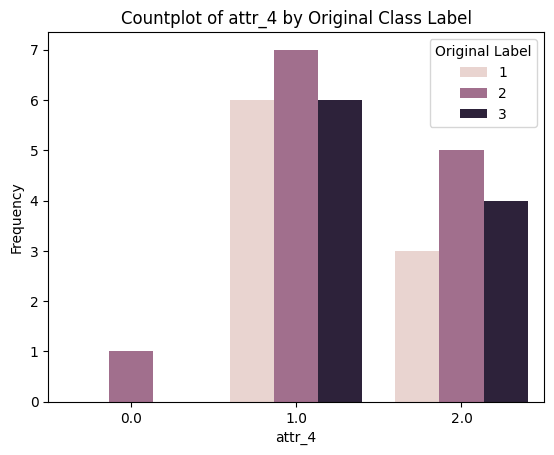

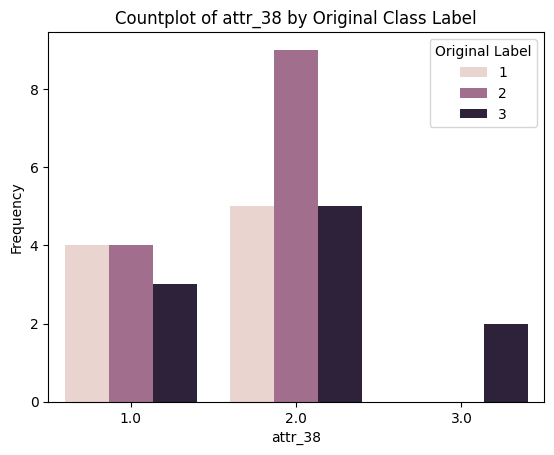

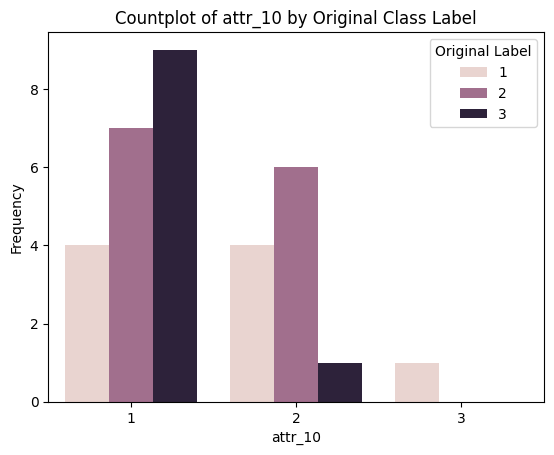

' \nattr_4, attr_38 - chosen because they are the ones having missing values\nattr_10 - just random extra sample to illustrate process.\n\nWhy using Countplots ?\n\n- Simply put, Boxplots good for ordinal data and countplots good for nominal data\n- Therefore, the boxplots dint show what range of numbers that are misrecorded \nbut if countplots the specific numbers of number as well as its frequency are shown \n\n'

In [45]:
# --- 10. Distribution Check for Nominal Features (CountPlots) ---
# Since the Lung Cancer dataset attributes are nominal (categorical),
# countplots are more suitable than boxplots. They clearly show:
#   - Each distinct category value
#   - How often each category appears (frequency)
# This makes it easier to spot suspicious or mis-recorded values
# In simple, outliers are important to detect because it could be a typo or mis-recorded value

print("\nCountplots for selected attributes (nominal features):")
for feat in ['attr_4', 'attr_38', 'attr_10']:  # attr_4 & attr_38 had missing values, attr_10 is extra sample
    plt.figure()
    sns.countplot(x=feat, hue='label', data=df)
    plt.title(f"Countplot of {feat} by Original Class Label")
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.legend(title="Original Label")
    plt.show()

''' 
attr_4, attr_38 - chosen because they are the ones having missing values
attr_10 - just random extra sample to illustrate process.

Why using Countplots ?

- Simply put, Boxplots good for ordinal data and countplots good for nominal data
- Therefore, the boxplots dint show what range of numbers that are misrecorded 
but if countplots the specific numbers of number as well as its frequency are shown 

'''

# X-axis shows feature values, anonymous medical test can be 0.0, 1.0, 2.0.
# Basically for this countplot, its like saying
# "For patients who got a certain test result (attr_4), what was their actual cancer diagnosis (the label)?"


#### 10. Scaling and PCA (Applied after implicit numerical treatment for nominals)

In [48]:
# Proposal mentions PCA for dimensionality reduction and StandardScaler for preprocessing.
# For nominal features like 0-3, these operations treat them as ordinal numbers.
# If these were truly unordered categories, one-hot encoding before scaling/PCA would be more appropriate.
# However, given your proposal's mention, we'll proceed assuming they are treated numerically/ordinally.

# Separate features X and binary target y
X = df.drop(['label', 'binary_label'], axis=1).astype(float)
y_binary = df['binary_label']

# Scale first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"\nFeatures have been standardized")

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"\nPCA has been applied")

# See the explained variance
# 
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance) * 100

print(f"\nVariance explained by Principal Component 1 : {explained_variance[0]:.2%} ")
print(f"\nVariance explained by Principal Component 1 : {explained_variance[1]:.2%}")
print(f"Total variance explained by the first 2 components: {total_explained_variance:.2f}%")
print(f"\n")

# Ordinal data - data that can be categorized and ranked - Eg : Ranks of olympic medalist gitu (warrior, legend, mythic)
# Nominal data can only be categorized - Eg : City of birth, pencil, gender


Features have been standardized

PCA has been applied

Variance explained by Principal Component 1 : 15.36% 

Variance explained by Principal Component 1 : 10.77%
Total variance explained by the first 2 components: 26.12%




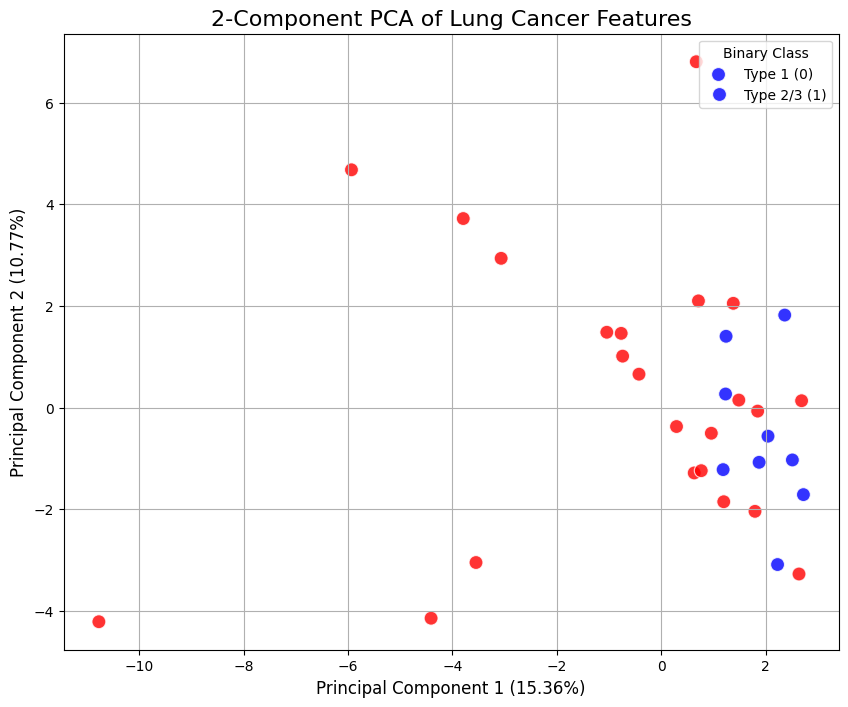

In [ ]:
# Visualize the PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_binary

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='label', 
    data=df_pca, 
    palette={0: 'blue', 1: 'red'},
    alpha=0.8,
    s=100
)

plt.title('2-Component PCA of Lung Cancer Features', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%})', fontsize=12)
plt.legend(title='Binary Class', labels=['Type 1 (0)', 'Type 2/3 (1)'])
plt.grid(True)
plt.show()